# Basics

## Libraries

We load the required libraries.

[Numpy](https://numpy.org/doc/stable/) is used for vector and matrix operations.

[Pyplot](https://matplotlib.org/2.0.2/api/pyplot_api.html) is a plotting software to draw graphs and display images.

PIL loads images from a file.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
# Helper functions for visualization purposes
from support import plot
np.seterr(divide='ignore', invalid='ignore')
from IPython.display import display, Math
import ipywidgets as widgets
import imageio as iio

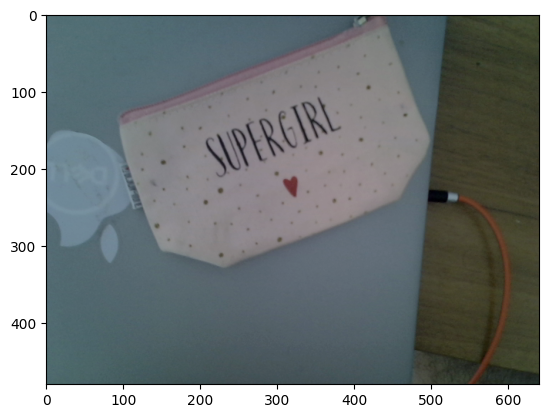

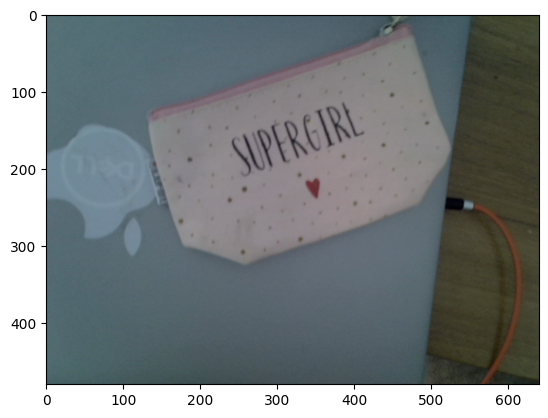

In [2]:
hdisplay = display("", display_id = True)

fig, ax = plt.subplots(1)

for frame in iio.imiter("<video1>"):
    try:
        ax.imshow(frame)
        hdisplay.update(fig)
    except KeyboardInterrupt:
        # save image to 'img' variable
        img = frame
        break

## Tensors in numpy (ndarray)

Tensors is a super group in which scalars (rank 0 tensor), vectors (rank 1 tensor) and matrices (rank 2 tensors).

We specify the dimensions $d_i$ of a rank $n$ tensor by $[d_1, d_2, \dots, d_n]$.

In numpy, these are handled by [ndarrays](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html).

For example, in numpy a vector of size [3] is specified by:

In [3]:
mat = np.ones([3])
plot.plot_tensor(mat)

<IPython.core.display.Math object>

A matrix of size $[3,4]$:

In [4]:
mat = np.ones([3,4])
plot.plot_tensor(mat)

<IPython.core.display.Math object>

And a tensor of shape $[3,4,2]$:

In [5]:
mat = np.ones([3,4,2])
plot.plot_tensor(mat)

<IPython.core.display.Math object>

A tensor can be transposed using the *np.tranpose* function, effectively swapping ranks:

In [6]:
mat = np.arange(10)
mat.shape = (2,5)
trans = np.transpose(mat)
display(Math(f"{plot.draw_matrix(mat)} ^T = {plot.draw_matrix(trans)}"))

<IPython.core.display.Math object>

Same is possible on higher ranks, specifying which ranks to switch:

In [7]:
mat = np.arange(4*3*2)
mat.shape = (4,3,2)
trans = np.transpose(mat, [0,2,1])
display(Math(f"{plot.draw_matrix(mat)} ^{{T_{{0,2,1}}}} = {plot.draw_matrix(trans)}"))
trans = np.transpose(mat, [1,2,0])
display(Math(f"{plot.draw_matrix(mat)} ^{{T_{{1,2,0}}}} = {plot.draw_matrix(trans)}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Operations on matrixes are specified as elemnt-wise.

For example the plus operator:

In [8]:


a = np.array([[0,1,0], [1,1,0]])
b = np.array([[1,1,0], [0,1,1]])
c = a+b
display(Math(f"{plot.draw_matrix(a)} + {plot.draw_matrix(b)} = {plot.draw_matrix(c)}"))

<IPython.core.display.Math object>

Same is true for other operators. 

**Note that the multiplication operator does not do a matrix multiplication!** (Use *np.matmul* instead.)

In [9]:
c = a - b
display(Math(f"{plot.draw_matrix(a)} - {plot.draw_matrix(b)} = {plot.draw_matrix(c)}"))
c = a * b
display(Math(f"{plot.draw_matrix(a)} \\otimes {plot.draw_matrix(b)} = {plot.draw_matrix(c)}"))
c = a/b
display(Math(f"{plot.draw_matrix(a)} / {plot.draw_matrix(b)} = {plot.draw_matrix(c)}"))
c = a ** b
display(Math(f"{plot.draw_matrix(a)} ^ {{{plot.draw_matrix(b)}}} = {plot.draw_matrix(c)}"))
c = np.matmul(a,np.transpose(b))
display(Math(f"{plot.draw_matrix(a)} \\cdot {plot.draw_matrix(np.transpose(b))} = {plot.draw_matrix(c)}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Logical operators are also possible:

In [10]:
c = np.logical_and(a, b)
display(Math(f"{plot.draw_matrix(a)} \land {plot.draw_matrix(b)} = {plot.draw_matrix(c)}"))
c = np.logical_or(a, b)
display(Math(f"{plot.draw_matrix(a)} \lor {plot.draw_matrix(b)} = {plot.draw_matrix(c)}"))
c = np.logical_xor(a, b)
display(Math(f"{plot.draw_matrix(a)} \oplus {plot.draw_matrix(b)} = {plot.draw_matrix(c)}"))
c = np.logical_not(a)
display(Math(f"\lnot {plot.draw_matrix(a)} = {plot.draw_matrix(c)}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Images in python

Load the image and and display it with pyplot.

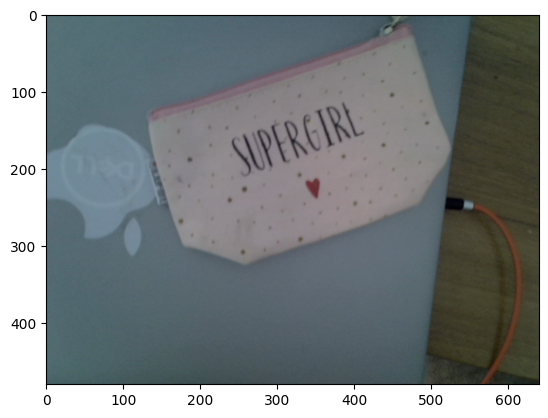

In [11]:
#img = Image.open("images/banana.png")
#img = np.asarray(img, dtype=np.ubyte)
plt.imshow(img)

We define a helper function to display multiple images for later use.

In [12]:
def show_images(imgs, names = None):
    fig, axes = plt.subplots(1, len(imgs))
    fig.set_size_inches(len(imgs) * 5, 5)
    if not names:
        names = [''] * len(imgs)
    for img, ax, name in zip(imgs, axes, names):
        ax.imshow(img, cmap='grey')
        ax.title.set_text(name)
    plt.show()

# Digitalization

An image is stored as a *tensor* of rank $[w,h,c]$, where:
- $w$: The width of the image.
- $y$: The height of the image.
- $c$: The channels of the image, usually in RGB (red, green, blue) and alpha (a).

This looks like this:

In [13]:
plot.plot_tensor(img[20:26,20:26,0:3])

<IPython.core.display.Math object>


To inspect each channel, we transpose the representation of the image (swap ranks) to get a vector of the three image channels.

Values are also converted to floating point values $\in [0,1]$ to make calculations easier.

In [14]:
img = img / 255
channels = np.transpose(img, (2, 0, 1))
R,G,B = channels[:3]

Display every channel of the image.

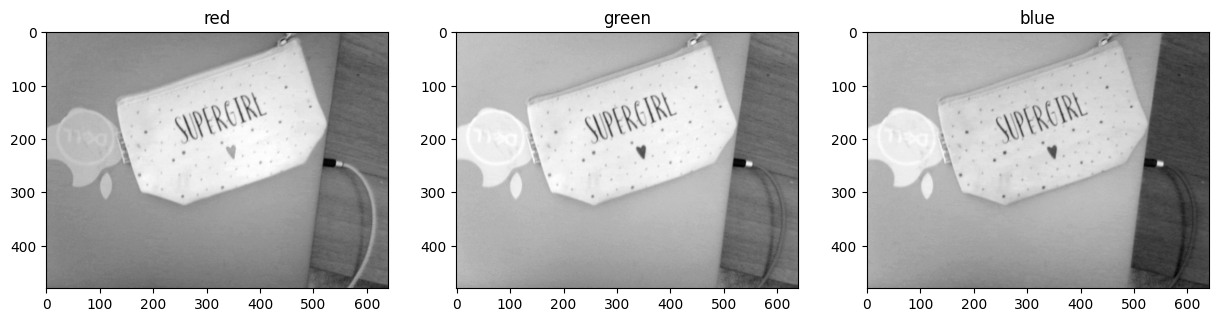

In [15]:
show_images([R,G,B], ['red', 'green', 'blue'])

## HSV representation

There are other representations, like HSV:

It uses the *chroma* $C$:
$$
max = max(R,G,B)\\
min = min(R,G,B)\\
C = max -min
$$

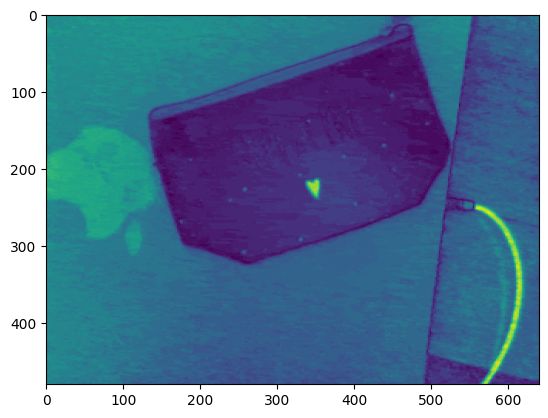

In [16]:

def chroma(R,G,B):
    max = np.max([R,G,B], 0)
    min = np.min([R,G,B], 0)
    return max-min
plt.imshow(chroma(R,G,B))

Then calculates the hue $H$:
$$
H' =\\
H = 60\deg \times H'
$$

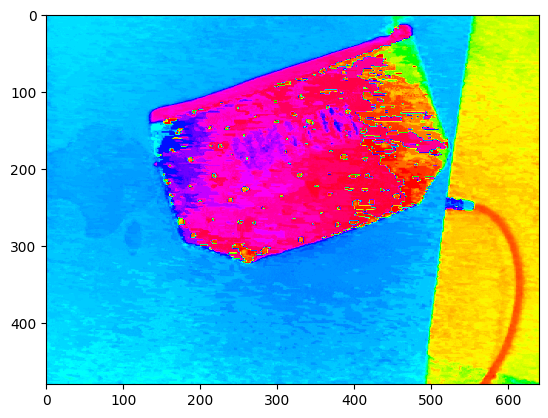

In [18]:
R,G,B = channels

def hue(R,G,B):
    C = chroma(R,G,B)
    max = np.max([R,G,B], 0)
    HR = np.mod((G-B)/C, 6)
    HG = (B-R)/C + 2
    HB = (R-G)/C + 4
    H = np.where(np.logical_and(R == max, C>0), HR, 0)
    H = np.where(np.logical_and(G == max, C>0), HG, H)
    H = np.where(np.logical_and(B == max, C>0), HB, H)
    return H
plt.imshow(hue(R,G,B), vmin = 0, vmax = 6, cmap = 'hsv')

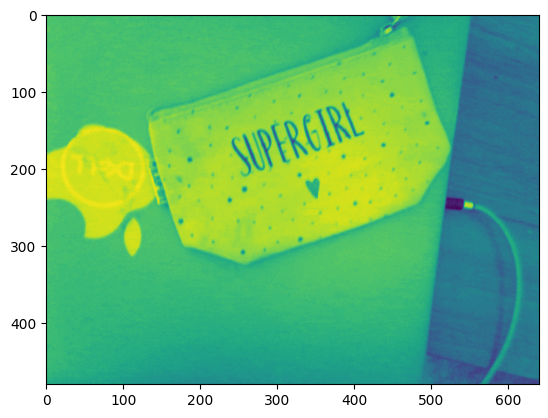

In [19]:
def value(R,G,B):
    return np.max([R,G,B], 0)

plt.imshow(value(R,G,B))

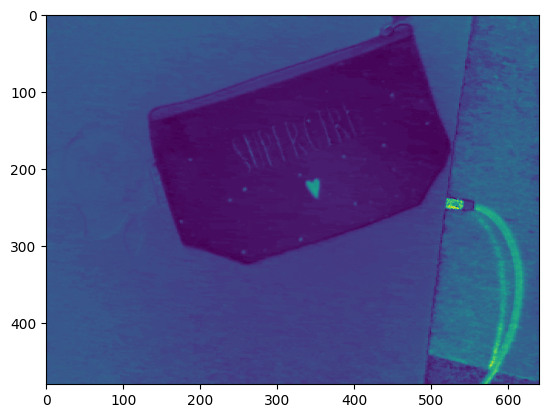

In [20]:
def saturation(R,G,B):
    return chroma(R,G,B) / value(R,G,B)

plt.imshow(saturation(R,G,B))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


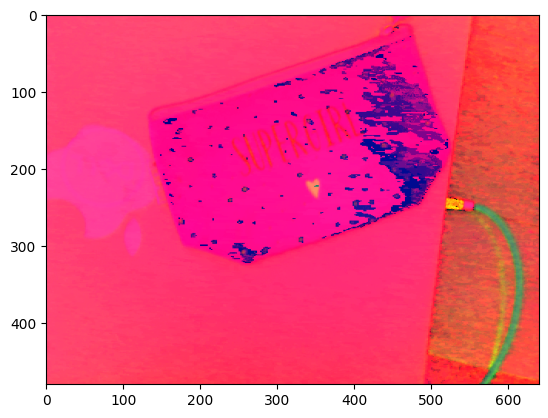

In [21]:
def to_HSV(R,G,B):
    return hue(R,G,B), saturation(R,G,B), value(R,G,B)

plt.imshow(np.transpose(to_HSV(R,G,B), [1,2,0]))
plt.show()

The HSV representation can be calculated by inversing the operations.

This is done by using this shorthand taken from [wikipedia](https://de.wikipedia.org/wiki/HSV-Farbraum#:~:text=In%20HSV%20ist%20der%20Farbort,%25%20%3D%20ges%C3%A4ttigte%2C%20reine%20Farbe).

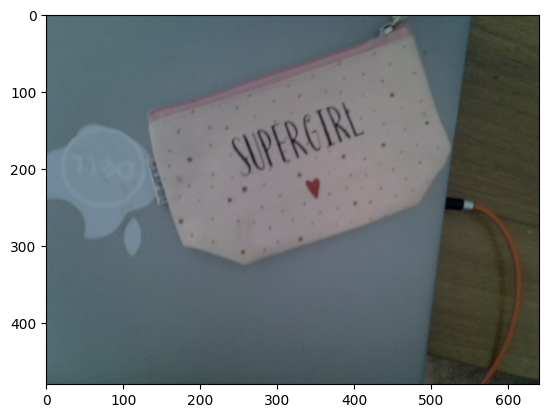

In [22]:
def to_RGB(H,S,V):
    h = np.floor(H)
    f = H - h
    p = V * (1-S)
    q = V * (1 - S * f)
    t = V * (1 - S * (1-f))
    rgb = np.where(h == 1, [q, V, p], [V,t,p])
    rgb = np.where(h == 2, [p, V, t], rgb)
    rgb = np.where(h == 3, [p, q, V], rgb)
    rgb = np.where(h == 4, [t, p, V], rgb)
    rgb = np.where(h == 5, [V,p,q], rgb)
    return rgb

h,s,v = to_HSV(R,G,B)
r,g,b = to_RGB(h,s,v)
rec_img = np.transpose([r,g,b], [1,2,0])
plt.imshow(rec_img)
plt.show()

Task:
Eperience what happens when manipulating the values in HSV space!

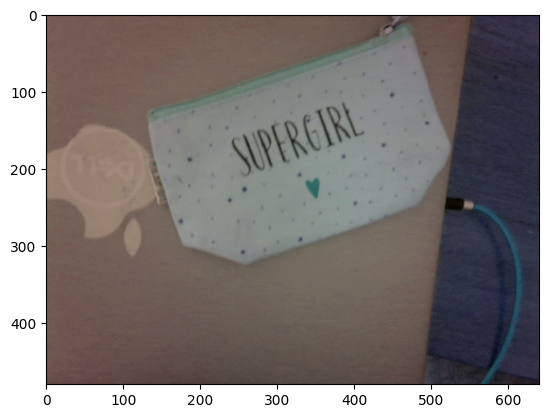

In [23]:
h,s,v = to_HSV(R,G,B)
#v = np.full_like(v, 0.5)
#s = np.full_like(s, 1)
h = (h + 3) % 6
#v = np.floor(v*3) / 3
#h = np.floor(h*3) / 3
r,g,b = to_RGB(h,s,v)
rec_img = np.transpose([r,g,b], [1,2,0])
plt.imshow(rec_img)
plt.show()

There are other, similar representations:
- HSL: Relative **l**ightness
- HSB: **B**rightness
- HSI: **I**ntensity

# Object Detection
## Thresholding



In [1]:
c = chroma(R,G,B)
plt.hist(c)
plt.show()

NameError: name 'chroma' is not defined

In [60]:
@widgets.interact(x = (0.0, 0.5, 0.02), y = (0.0, 0.5, 0.02))
def chroma_cutoff(x = 0.2, y = 0.3):
    try:
        plt.imshow(np.logical_or (c > x, c < y))
        plt.show()
    except:
        pass

interactive(children=(FloatSlider(value=0.2, description='x', max=0.5, step=0.02), FloatSlider(value=0.3, desc…

In [72]:
## Erosion and Dilation

from skimage.morphology import erosion, dilation, disk

def create_mask(x,y,e):
    mask = np.logical_or (c > x, c < y)
    if e > 0:
        mask = erosion(mask, footprint = disk(e))
    elif e < 0:
        mask = dilation(mask, footprint = disk(-e))
    return mask

@widgets.interact(x = (0.0, 0.5, 0.02), y = (0.0, 0.5, 0.02), e = (-10, 10, 1))
def chroma_cutoff(x = 0.2, y = 0.3, e = 0):
    try:
        plt.imshow(create_mask(x,y,e))
        plt.show()
    except:
        pass

interactive(children=(FloatSlider(value=0.2, description='x', max=0.5, step=0.02), FloatSlider(value=0.3, desc…

## Bounding Boxes

We draw a bounding box by determining the left and right most pixels, same for top and bottom.

In [73]:
@widgets.interact(x = (0.0, 0.5, 0.02), y = (0.0, 0.5, 0.02), e = (-10, 10, 1))
def bounding_box(x = 0.2, y = 0.3, e = 0):
    mask = create_mask(x,y,e)
    fig, (ax1, ax2) = plt.subplots(2)
    if np.any(mask):
        index_y, index_x = np.where(mask)
        lmin = np.min(index_x)
        lmax = np.max(index_x)
        rmin = np.min(index_y)
        rmax = np.max(index_y)
        box = plt.Rectangle((lmin,rmin), lmax - lmin, rmax - rmin,linewidth=1,edgecolor='r',facecolor='none')
        ax1.imshow(img)
        ax1.add_patch(box)
        ax2.imshow(mask)
        plt.show()

interactive(children=(FloatSlider(value=0.2, description='x', max=0.5, step=0.02), FloatSlider(value=0.3, desc…

## Segmentation



### Chan Vese

In [82]:
from skimage.segmentation import chan_vese

@widgets.interact(mu = (0,2,0.05), lambda1 = (0.5, 2, 0.1), lambda2 = (0.5, 2, 0.1))
def plot_chan_vese(mu = 0.25, lambda1 = 1., lambda2=1.):
    plt.imshow(chan_vese(G, mu= mu, lambda1 = lambda1, lambda2=lambda2))

interactive(children=(FloatSlider(value=0.25, description='mu', max=2.0, step=0.05), FloatSlider(value=1.0, de…

### Flooding

In [91]:
from skimage.measure import label

@widgets.interact(x = (0.0, 0.5, 0.02), y = (0.0, 0.5, 0.02), e = (-10, 10, 1))
def bounding_box(x = 0.2, y = 0.3, e = 0):
    mask = create_mask(x,y,e)
    labels = label(mask)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,3))
    for i in np.unique(labels):
        index_y, index_x = np.where(labels == i)
        lmin = np.min(index_x)
        lmax = np.max(index_x)
        rmin = np.min(index_y)
        rmax = np.max(index_y)
        box = plt.Rectangle((lmin,rmin), lmax - lmin, rmax - rmin,linewidth=1,edgecolor='r',facecolor='none')
        ax1.add_patch(box)
    ax1.imshow(img)
    ax2.imshow(mask)
    ax3.imshow(labels, cmap = 'Set1')
    plt.show()

interactive(children=(FloatSlider(value=0.2, description='x', max=0.5, step=0.02), FloatSlider(value=0.3, desc…

## Gamma correction

Light values may be mapped to other ranges, for example by using [gamma correction](https://en.wikipedia.org/wiki/Gamma_correction).

It maps all values in a non-linear fashion by exponating with $\gamma$:
$$
img_{out} = img^\gamma
$$

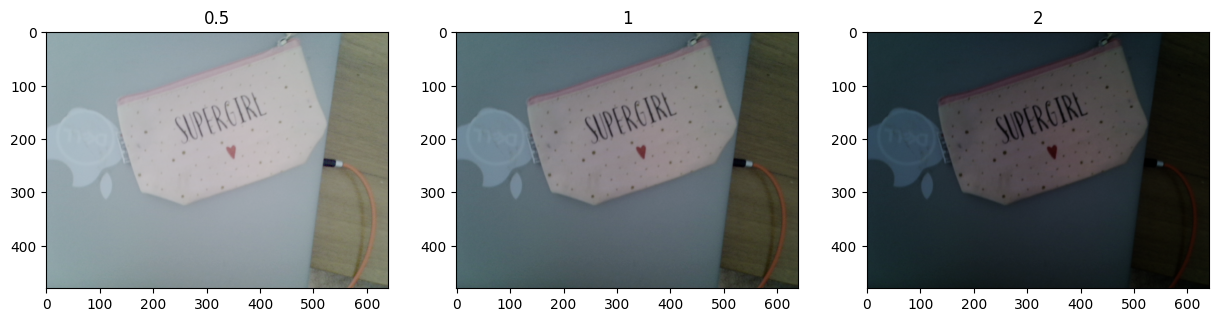

In [27]:
def gamma_cor(img, gamma: float):
    return img ** gamma

a = gamma_cor(img, 0.5)
b = gamma_cor(img, 1)
c = gamma_cor(img, 2)

show_images([a,b,c], [0.5,1,2])

# Filters


We select our grayscale image.

In [28]:
image = channels[1]

## Fourier Transform
Images are 2 dimensional signals where $x$ and $y$ are their coordinates in space with $0<x<w$ and $0<y<h$:

$$
img(x,y)
$$

Like in 1D signal processing, we can represent this function as frequencies:

$$
F(\omega_1, \omega_2) = \sum_{x=-\infty}^\infty \sum_{y=-\infty}^\infty img(x,y) e ^{-i\omega_1 x-i\omega_2 y}
$$

Since images are *discrete*, the discrete fourier transform (DFT) is used:

$$
F(p, q) = \sum_{x=0}^w \sum_{y=0}^h img(x,y) e ^{-\frac{i2 \pi x}{w}-\frac{i2 \pi y}{h}}
$$

More information on:
(https://de.mathworks.com/help/images/fourier-transform.html)


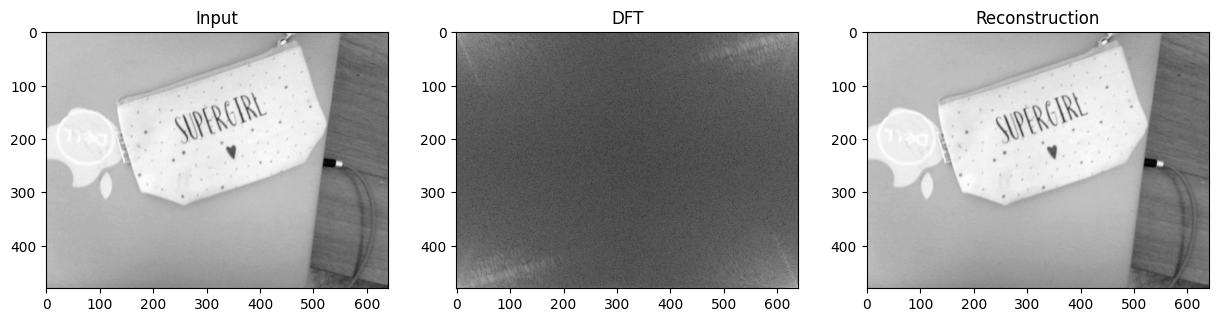

In [29]:
from scipy.fft import fftn, ifftn
import skimage
ft = fftn(image)
reconstr = np.real(ifftn(ft))
magnitudes = np.log(np.abs(ft))
show_images([image, magnitudes, reconstr], ["Input", "DFT", "Reconstruction"])


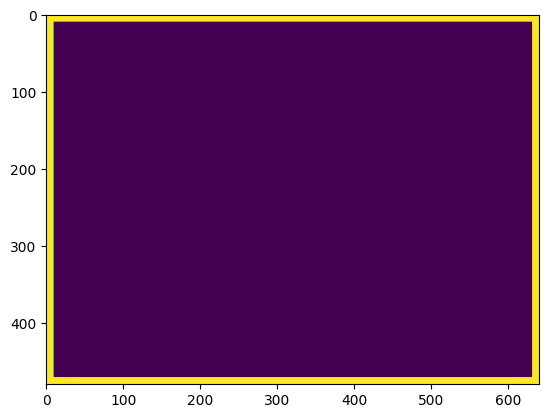

In [30]:
width = 10
rr, cc= skimage.draw.rectangle((width, width), np.array(ft.shape) - (width, width), shape=ft.shape)
mask = np.ones(ft.shape, bool)
mask[rr, cc] = False
plt.imshow(mask)

### Low pass filter

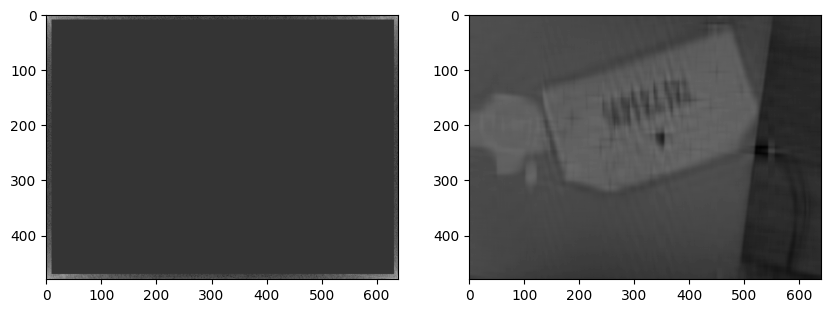

In [31]:
low_pass = np.copy(ft)
low_pass[rr, cc] = 1.
reconstr_lp = np.real(ifftn(low_pass))
show_images([np.log(np.abs(low_pass)), reconstr_lp])

### High pass filter

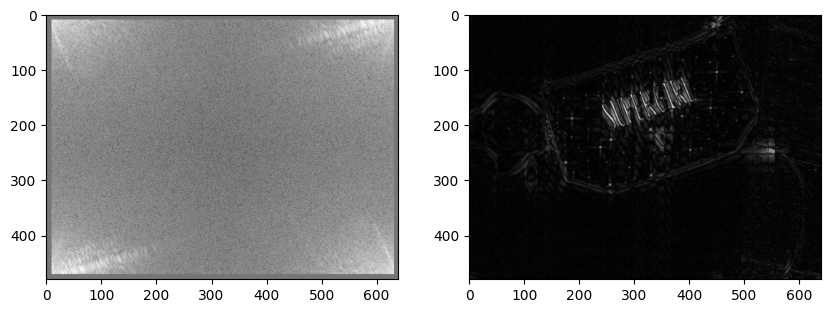

In [32]:
high_pass = np.copy(ft)
high_pass[mask] = 1.
reconstr_hp = np.abs(np.real(ifftn(high_pass)))
show_images([np.log(np.abs(high_pass)), reconstr_hp])

## Discrete Filters

Discrete filtering can also be represented by the **convolution operation**:
$$
(f * g)[n] = \sum_{m=-\infty}^\infty f[m]g[n - m]
$$

We declare a function that lets us apply a discrete filter to an grayscale image:

The filter iterates over each position in the matrix:

![alt text](https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif "Title")

In [33]:
from scipy.ndimage import convolve

mat = np.arange(16)
mat.shape = (4,4)
filter = np.array([[0,0,1],[0,0,0],[0,0,0]])

conv = convolve(mat, filter, mode = "constant")

display(Math(f"{plot.draw_matrix(mat)} * {plot.draw_matrix(filter)} = {plot.draw_matrix(conv)}"))

<IPython.core.display.Math object>

Filters are cummutative:

In [34]:
filter_a = np.array([[0,0,1],[0,0,0],[0,0,0]])
filter_b = np.array([[0,0,0],[0,0,0],[1,0,0]])

both_applied = convolve(convolve(mat, filter_a, mode = 'wrap'), filter_b, mode = 'wrap')

display(Math(f"{plot.draw_matrix(mat)} * {plot.draw_matrix(filter_a)} * {plot.draw_matrix(filter_b)} = {plot.draw_matrix(both_applied)}"))

combined_filter = convolve(filter_a, filter_b, mode='wrap')
combined_applied = convolve(mat, combined_filter, mode='wrap')

display(Math(f"{plot.draw_matrix(mat)} * \\left( {plot.draw_matrix(filter_a)} * {plot.draw_matrix(filter_b)} \\right) = {plot.draw_matrix(mat)} * {plot.draw_matrix(combined_filter)} = {plot.draw_matrix(combined_applied)}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Edge Detection

Edges of an image can be seen as high outputs in their **first-order derivate**.

This can be easily calculated using the following filters for the x and y directions:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

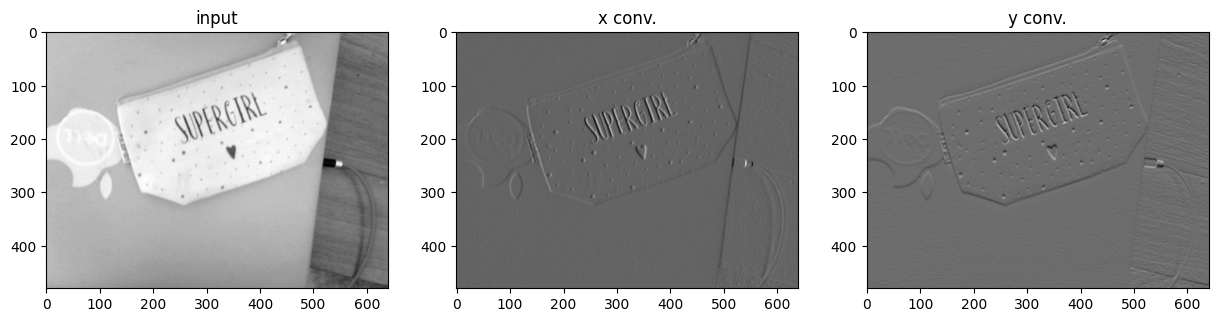

In [35]:
filter_x = np.array([[0,0,-0],[1,0,-1],[0,0,0]])
filter_y = np.transpose(filter_x)

plot.plot_tensor(filter_x)
plot.plot_tensor(filter_y)

show_images([G, convolve(G, filter_x), convolve(G, filter_y)], ["input", "x conv.", "y conv."])

We can use the commutative nature of the filters to combine these into the sobel filter:

<IPython.core.display.Math object>

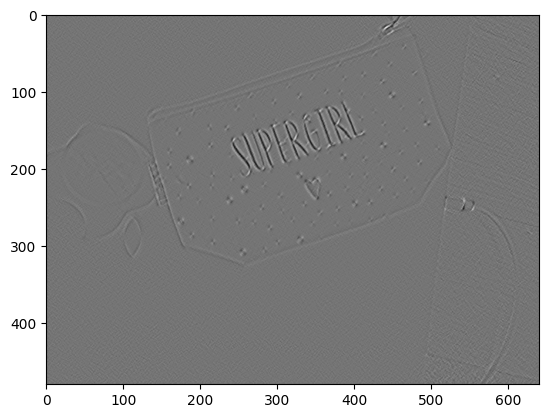

In [36]:
sobel = convolve(filter_x, filter_y, mode='constant')
plot.plot_tensor(sobel)
filtered = convolve(G, sobel)
plt.imshow(filtered, cmap='grey')

By only using the absolute, we receive the strength of each edge.

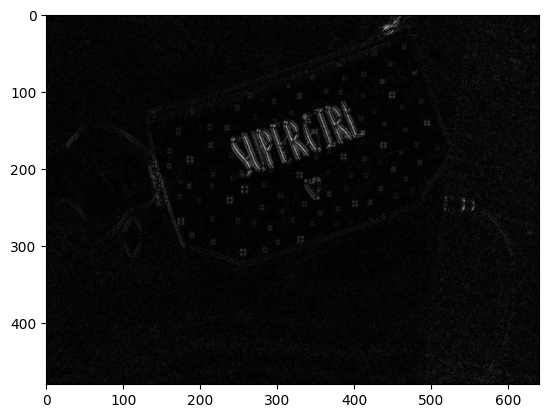

In [37]:
absolute = np.abs(filtered)
plt.imshow(absolute, cmap='grey')

By threshholding we only keep the significant edges.

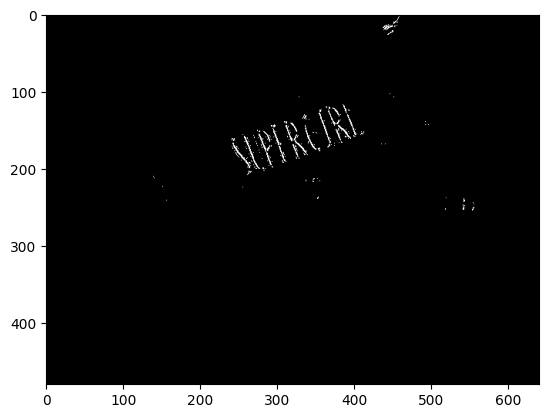

In [38]:
threshold = absolute > 0.1
plt.imshow(threshold, cmap='grey')

We can look at various thresholds for our image.

Often, the ideal threshold value depends on the image and task at hand.

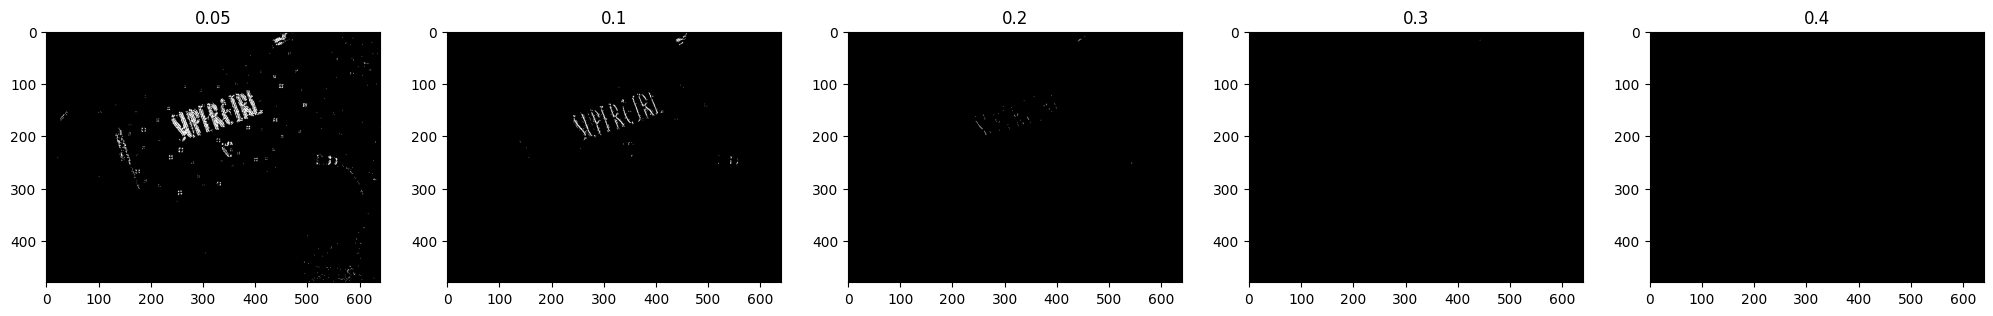

In [39]:
imgs = []
for t in [0.05,0.1,0.2,0.3,0.4]:
    imgs.append(absolute > t)
show_images(imgs, [0.05,0.1,0.2,0.3,0.4])

There are various pre-existing edge filters.

For example, the **laplace** filter uses this kernel:

In [40]:
laplace = np.array([[0, -1, 0],[-1,4,-1],[0,-1,0]])
plot.plot_tensor(laplace)

<IPython.core.display.Math object>

There is also the *canny edge filter* that has an additional step, only keeping edges that belong to a line:

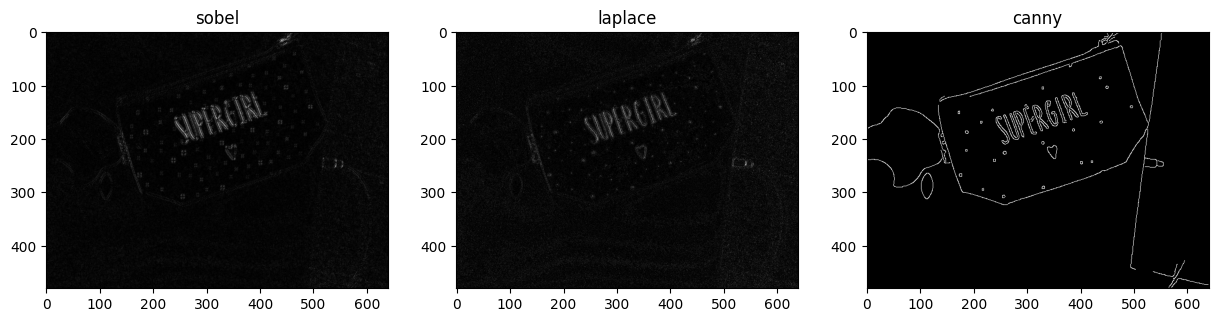

In [41]:
from skimage.feature import canny

show_images([np.abs(convolve(G, sobel)), np.abs(convolve(G, laplace)), canny(G)], ["sobel", "laplace", "canny"])

### Smoothing

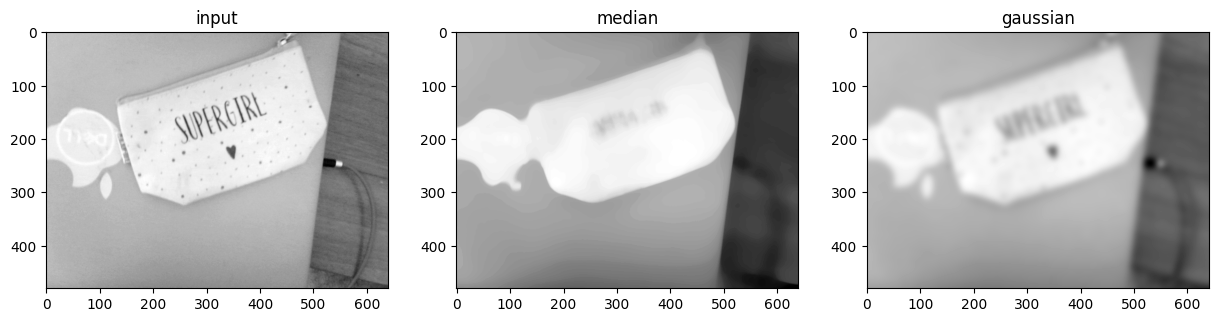

In [42]:
from skimage.filters import gaussian, median
from skimage.morphology import disk

med = median(image, footprint=disk(20))
gauss = gaussian(image, 6.)

show_images([image, med, gauss], ["input", "median", "gaussian"])

## Task: Comic filter

Use the known filters and conversions to make a comic-like filter!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


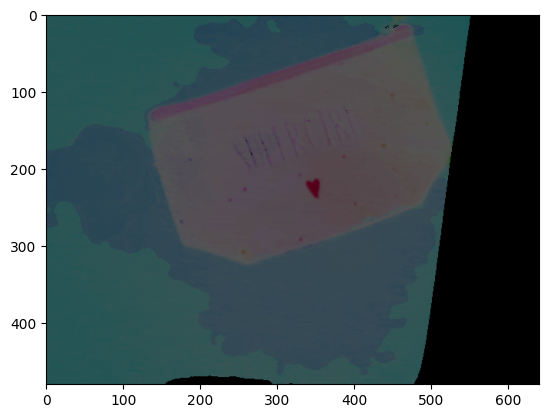

In [43]:
from skimage.filters import median
from skimage.morphology import disk
h,s,v = to_HSV(R,G,B)

v = median(v, footprint = disk(10))
h = median(h, footprint = disk(10))
v = np.floor(v*3) / 3
h = np.floor(h*3) / 3
s = s* 2
edges = np.logical_and(np.abs(convolve(v, sobel)) < 0.4, np.abs(convolve(s, sobel)) < 0.32)
v = np.where(edges, v, 0.)
r,g,b = to_RGB(h,s,v)


rec_img = np.transpose([r,g,b], [1,2,0])

plt.imshow(rec_img)

# Features

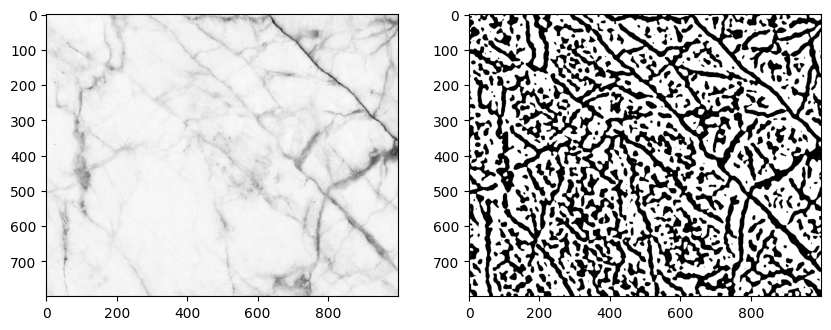

In [44]:
from skimage.filters import hessian

texture = np.asarray(Image.open("images/texture.png"), np.uint8)
gray = np.mean(texture, -1)
show_images([gray, hessian(gray, sigmas = range(5,6,1))])

### Frangi filter

The Frangi filter (https://link.springer.com/chapter/10.1007/BFb0056195#editor-information)[Frangi, A.F., Niessen, W.J., Vincken, K.L., Viergever, M.A. (1998). Multiscale vessel enhancement filtering. In: Wells, W.M., Colchester, A., Delp, S. (eds) Medical Image Computing and Computer-Assisted Intervention — MICCAI’98. MICCAI 1998. Lecture Notes in Computer Science, vol 1496. Springer, Berlin, Heidelberg. https://doi.org/10.1007/BFb0056195]
uses the hessian filter to search for tube-like structures. This is useful to find structural features like crags.

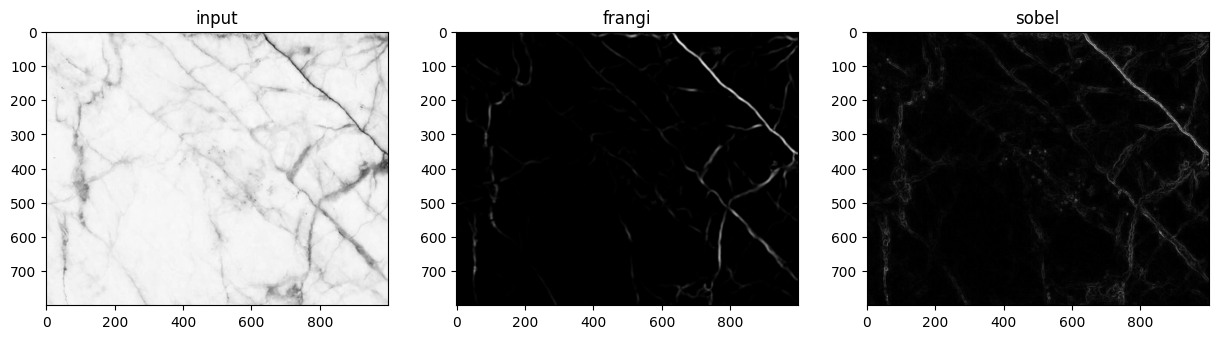

In [45]:
from skimage.filters import frangi, sobel

show_images([gray, frangi(gray, sigmas = range(5,6,1)), sobel(gray)], ["input", "frangi", "sobel"])

### Hough Transform

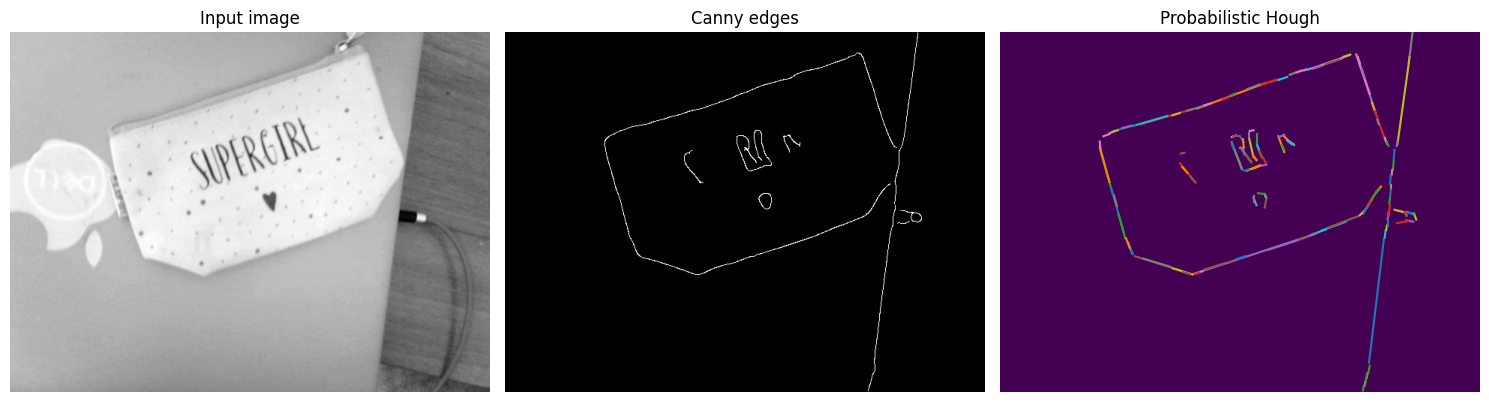

In [46]:
from skimage.transform import probabilistic_hough_line
from skimage.feature import canny


edges = canny(channels[1] * 255, 5, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5, line_gap=3)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(channels[1], cmap="gray")
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap="gray")
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, channels[1].shape[1]))
ax[2].set_ylim((channels[1].shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()